In [37]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot

Index(['NHC', 'Edad', 'Sexo', 'Lado', 'Anticohagulantes',
       'ASA(Riesgo anestesico paciente)', 'Motivo Intervencin',
       'Dia de Ingreso', 'Día Semana Ingreso', 'Dia de la semana iqx',
       'Tipo de protesis', 'Cirujano Principal', 'Dia Intervencion',
       'Dia Semana alta', 'Día de alta', 'Días ingresado', 'Hora de entrada',
       'Tiempo TOTAL QX', 'Tipo de anestesia', 'ATB(Antibiotico)', 'Momento',
       'HB_PRE', 'HTO-PRE', 'HB_POST', 'HTO-POST', 'TX(Transfusion)',
       'Complicaciones Post', 'Urbano', '¿Patologías previas?', 'HB_VAR'],
      dtype='object')


<Axes: >

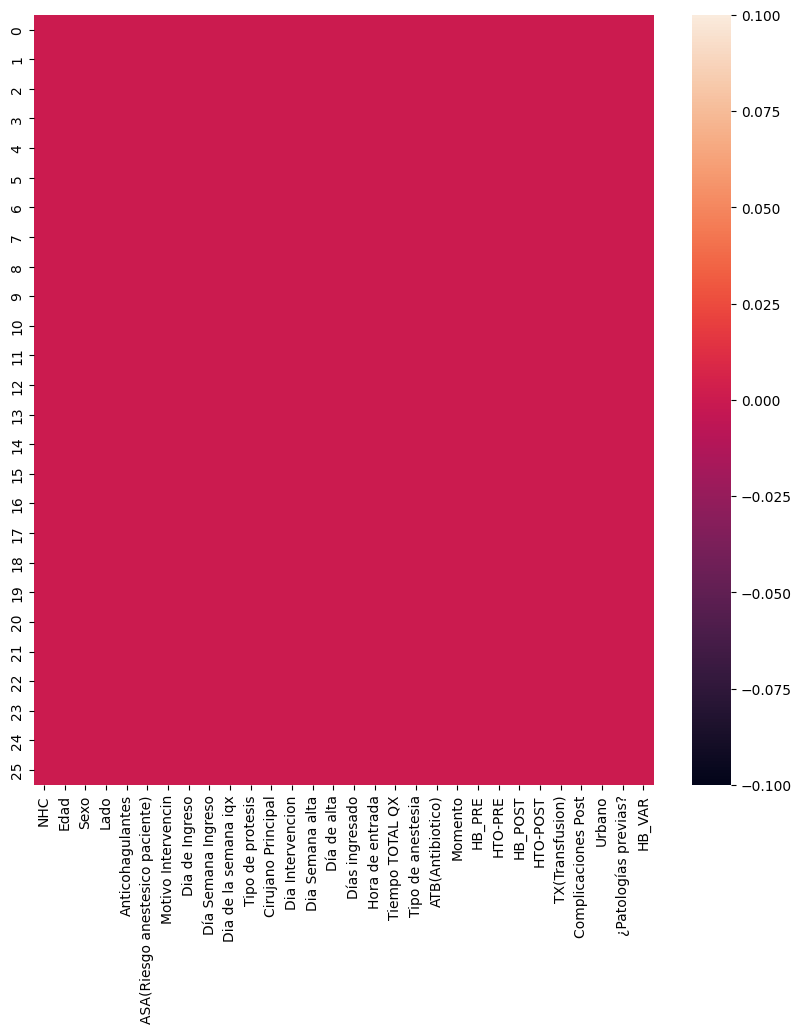

In [38]:
#Abro el archivo csv
df = pd.read_csv('Hombres.csv', sep=';', decimal=',')
df.head()
print(df.columns)
sns.heatmap(df.isnull ()) #Para comprobar si hay valores nulos


[Text(0.5, 1.0, 'Countplot de variable de salida "HB_PRE"')]

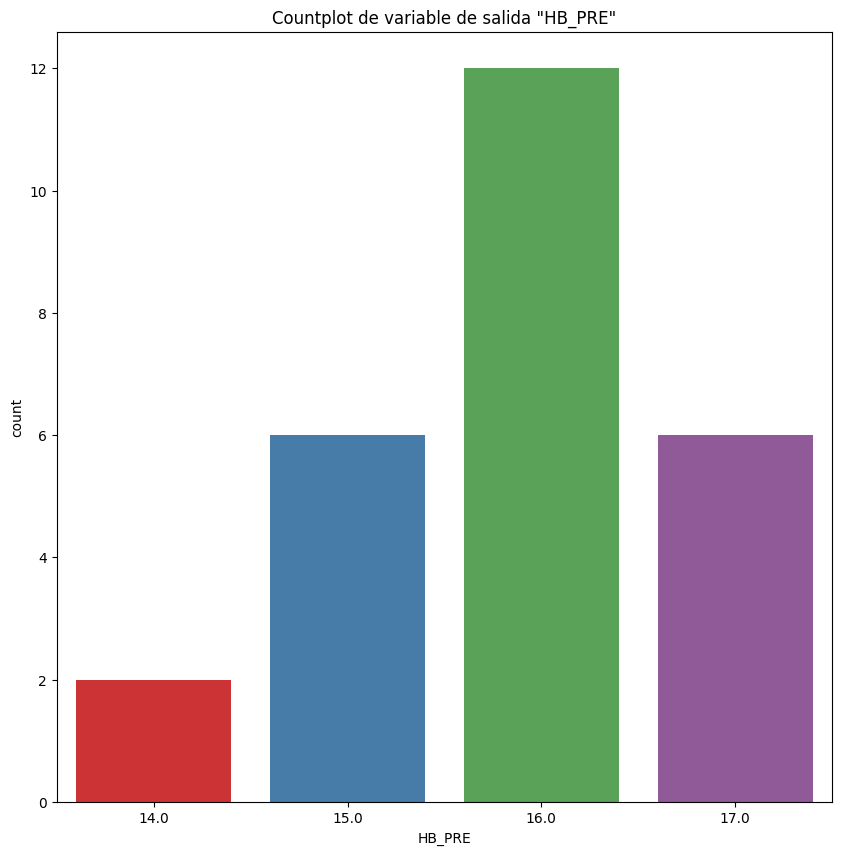

In [39]:
df['HB_PRE'] = df['HB_PRE'].round(0)
sns.countplot (x = 'HB_PRE', data = df, palette= 'Set1'). set(title = 'Countplot de variable de salida "HB_PRE"')

[Text(0.5, 1.0, 'Countplot de variable de salida "Día Semana Ingreso"')]

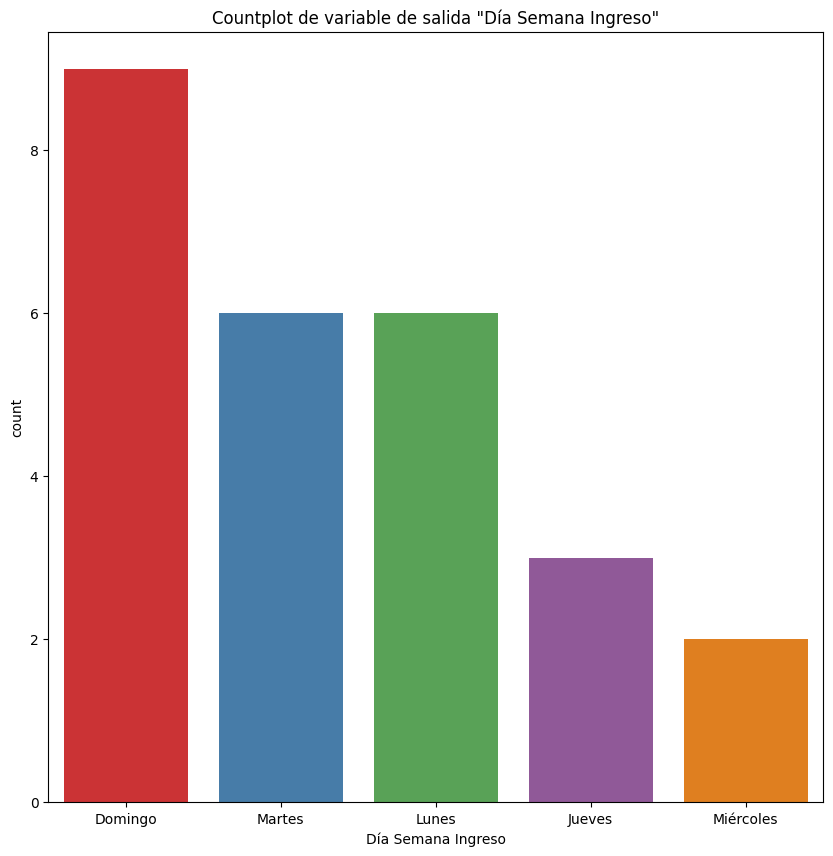

In [40]:
sns.countplot (x = 'Día Semana Ingreso', data = df, palette= 'Set1'). set(title = 'Countplot de variable de salida "Día Semana Ingreso"')

[Text(0.5, 1.0, 'Countplot de variable de salida "HB_PRE en relación con el día del ingreso"')]

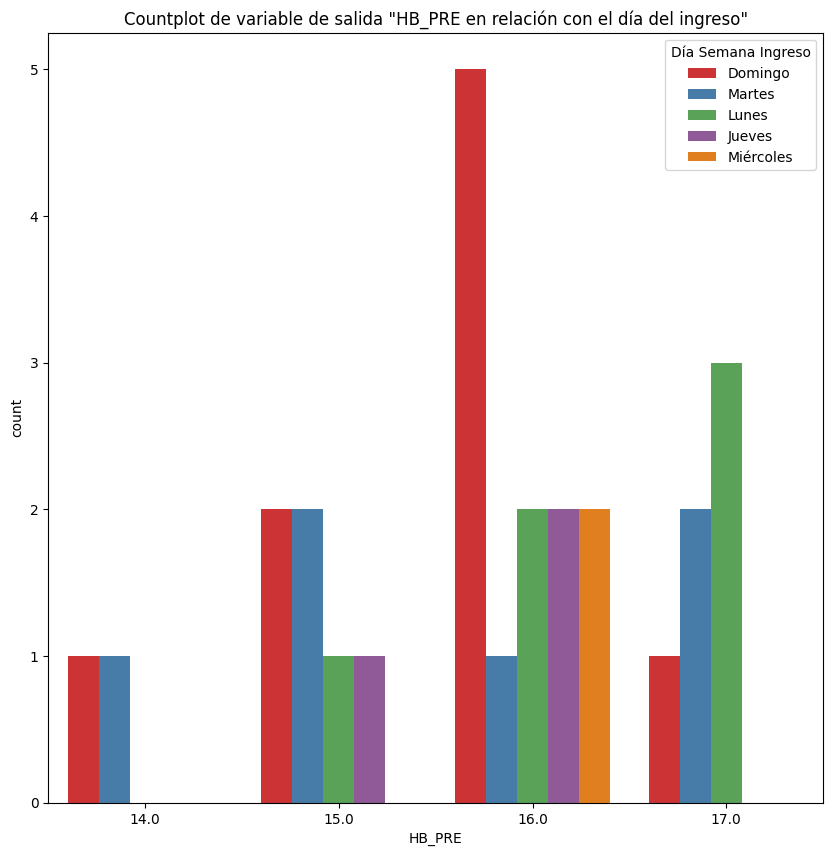

In [41]:
sns.countplot (x = 'HB_PRE', hue='Día Semana Ingreso', data = df, palette= 'Set1'). set(title = 'Countplot de variable de salida "HB_PRE en relación con el día del ingreso"')

[Text(0.5, 1.0, 'Countplot de variable Edad y ASA')]

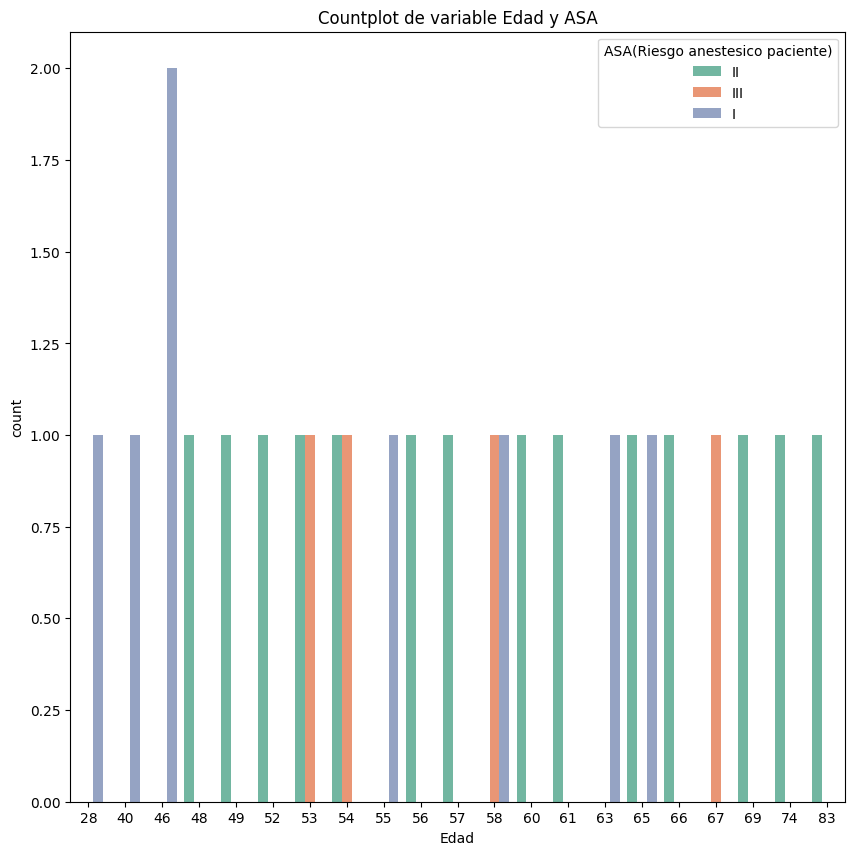

In [42]:
#sns.countplot (x = 'HB_PRE', hue= "ACO(Antcohagulantes)",data = df, palette= 'Set1'). set(title = 'Countplot de variable HB_PRE y ACO')
#sns.countplot (x = 'HB_PRE', hue= "Lado",data = df, palette= 'Set3'). set(title = 'Countplot de variable HB_PRE y Lado')
sns.countplot (x = 'Edad', hue= "ASA(Riesgo anestesico paciente)",data = df, palette= 'Set2'). set(title = 'Countplot de variable Edad y ASA')

[Text(0.5, 1.0, 'Gráfico de cajas Edad-Procedencia')]

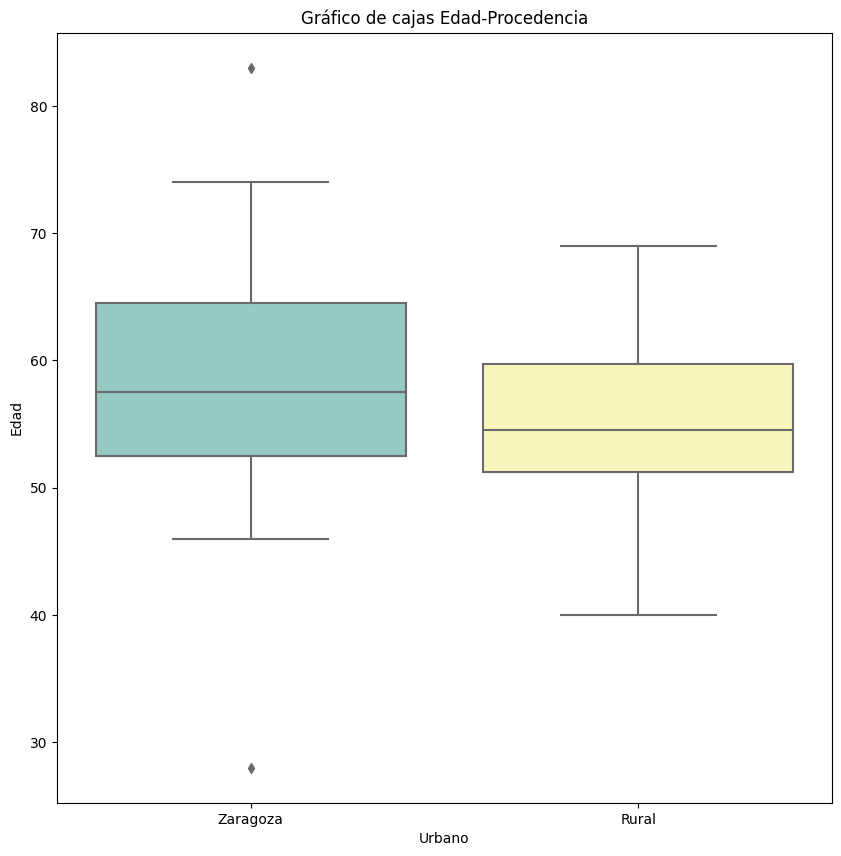

In [43]:
sns.boxplot(y='Edad', x='Urbano', data=df, palette='Set3'). set(title="Gráfico de cajas Edad-Procedencia")

In [44]:
df.info()
#aquí compruebo qué variables son categóricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NHC                              26 non-null     int64  
 1   Edad                             26 non-null     int64  
 2   Sexo                             26 non-null     object 
 3   Lado                             26 non-null     object 
 4   Anticohagulantes                 26 non-null     object 
 5   ASA(Riesgo anestesico paciente)  26 non-null     object 
 6   Motivo Intervencin               26 non-null     object 
 7   Dia de Ingreso                   26 non-null     object 
 8   Día Semana Ingreso               26 non-null     object 
 9   Dia de la semana iqx             26 non-null     object 
 10  Tipo de protesis                 26 non-null     object 
 11  Cirujano Principal               26 non-null     object 
 12  Dia Intervencion        

In [45]:
#convierto las variables categóricas en 'dummy variables' (variables con 2 o más niveles de categorías)
#Anticohagulantes= pd.get_dummies(df['ACO(Antcohagulantes)'],drop_first=True)
Riesgo= pd.get_dummies(df['ASA(Riesgo anestesico paciente)'],drop_first=True)
Sexo= pd.get_dummies(df['Sexo'],drop_first=True)
Lado= pd.get_dummies(df['Lado'],drop_first=True)
Motivo= pd.get_dummies(df['Motivo Intervencin'],drop_first=True)
Urbano=pd.get_dummies(df['Urbano'],drop_first=True)
Pat_previas=pd.get_dummies(df['¿Patologías previas?'],drop_first=True)

In [46]:
#Reemplazo las anteriores columnas con dummies
df.drop(['Lado','Sexo','Motivo Intervencin', 'Urbano','TX(Transfusion)', 'Día Semana Ingreso','Complicaciones Post','Urbano', '¿Patologías previas?','ATB(Antibiotico)', 'Momento','Tipo de anestesia','Día de alta', 'Hora de entrada','Cirujano Principal', 'Dia Intervencion', 'Dia Semana alta','ASA(Riesgo anestesico paciente)','Dia de Ingreso', 'Dia de la semana iqx', 'Tipo de protesis','¿Patologías previas?'], axis=1, inplace=True)
#Concateno las nuevas columnas con las dummies al df
df = pd.concat([df,Lado,Motivo,Urbano,Pat_previas], axis = 1)
print(df.columns)

Index(['NHC', 'Edad', 'Anticohagulantes', 'Días ingresado', 'Tiempo TOTAL QX',
       'HB_PRE', 'HTO-PRE', 'HB_POST', 'HTO-POST', 'HB_VAR', 'Izquierdo',
       'Necrosis', 'Necrosis (perthes)', 'Zaragoza', 'Hernia discal lumbar',
       'Lumbalgia', 'Lumbalgia, obesidad, alcohol', 'NO', 'Obesidad',
       'Perthes'],
      dtype='object')


In [47]:
labels=pd.DataFrame(df['Anticohagulantes'])
labels.Anticohagulantes[labels.Anticohagulantes =='SI']=1
labels.Anticohagulantes[labels.Anticohagulantes =='NO']=0

df=df.drop(['Anticohagulantes'], axis=1)
labels=labels.apply(pd.to_numeric)

In [48]:
x_train, x_test, y_train, y_test=train_test_split(df, labels,test_size=0.1, random_state=0)
# Crear el modelo de regresión lineal
logmodel = LogisticRegression(class_weight='balanced').fit(x_train, y_train)
predictions_log=logmodel.predict(x_test)

/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
print (classification_report (y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [50]:
importance = logmodel.coef_ .flatten()

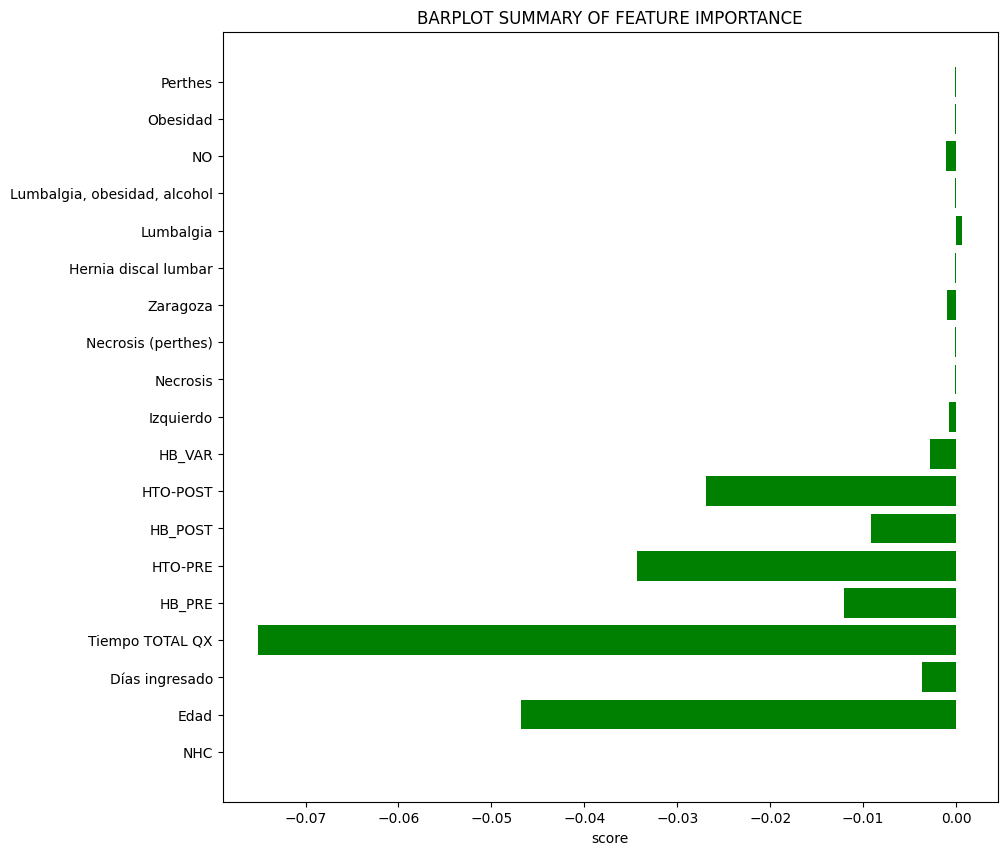

In [51]:
pyplot.rcParams ["figure.figsize" ] = (10, 10)
pyplot.barh(df.columns, importance, color = 'g')
pyplot.title ( "BARPLOT SUMMARY OF FEATURE IMPORTANCE")
pyplot.xlabel ("score" )
pyplot.show()